C:\Users\MGM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


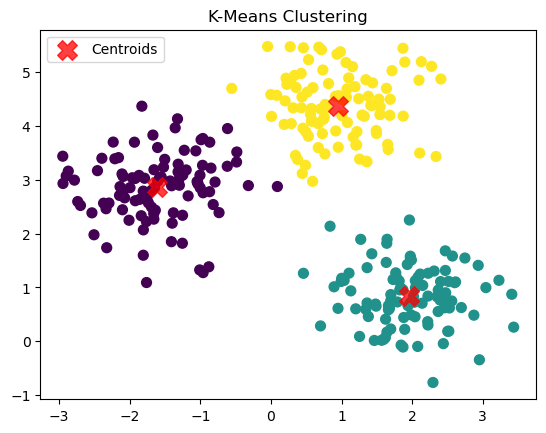

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()



Clustering Accuracy: 100.00%


C:\Users\MGM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


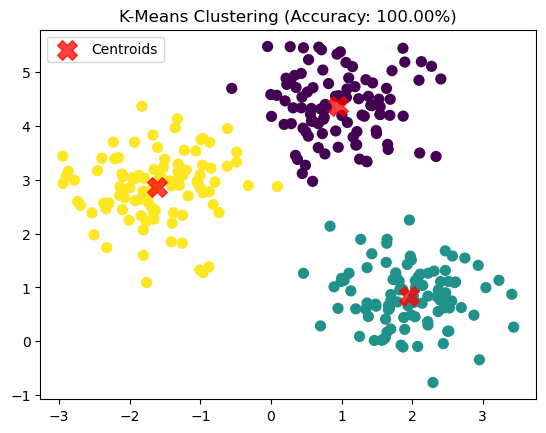

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Confusion matrix to match labels
conf_matrix = confusion_matrix(y_true, y_kmeans)

# Use Hungarian Algorithm to find best label permutation
row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # maximize accuracy

# Map predicted labels to true labels
label_mapping = dict(zip(col_ind, row_ind))
y_pred_mapped = np.array([label_mapping[label] for label in y_kmeans])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_mapped)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_pred_mapped, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (Accuracy: {accuracy * 100:.2f}%)")
plt.legend()
plt.show()
